In [17]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import numpy as np

In [16]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

In [18]:
def process_values(state: AgentState) -> AgentState:
    """
    This function handles multiple different inputs
    """
    if state["operation"] == "+":
        state["result"] = f"Hi there, {state['name']}! You total for today will be {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi there, {state['name']}! You total for today will be {np.prod(state['values'])}"
    return state

In [19]:
graph = StateGraph(AgentState)
graph.add_node("process_values", process_values)
graph.set_entry_point("process_values")
graph.set_finish_point("process_values")
app = graph.compile()

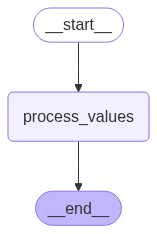

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
app.invoke({
    "values": [1,2,3,4],
    "name": "nikhil",
    "operation": "+"
})

{'values': [1, 2, 3, 4],
 'name': 'nikhil',
 'operation': '+',
 'result': 'Hi there, nikhil! You total for today will be 10'}

In [25]:
app.invoke({
    "values": [1,2,3,4],
    "name": "nikhil",
    "operation": "*"
})['result']

'Hi there, nikhil! You total for today will be 24'